In [54]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
!pip install imblearn  
!pip install sklearn

In [34]:
pgf = pd.read_csv("Bancarrota.finalll.csv")
data= pgf.dropna()
print(data)
print(list(data.columns))

     Data Year - Fiscal  Tobin's Q     EPS  Liquidity  Profitability  \
0                  2007      6.650  -0.360     -1.350        -20.950   
1                  2009      0.825  -4.834      0.245         -1.853   
2                  2008      5.020  -0.056      0.041        -14.427   
3                  2008      0.823  -0.375      0.073         -1.658   
4                  2008      2.664 -10.544     -0.416         -1.776   
..                  ...        ...     ...        ...            ...   
190                2012      1.676  -5.622     -1.315         -1.358   
191                2007      1.460   0.010     -0.400        -21.900   
192                2007      1.114  -0.337     -0.143         -0.353   
193                2007      0.930  -8.530      0.000         -0.070   
194                2008      1.510  -0.043      0.252         -8.346   

     Productivity  Leverage Ratio  Asset Turnover  Operational Margin  \
0          -0.160          -1.160           0.630             

In [33]:
data['BK'].value_counts()

0    120
1     71
Name: BK, dtype: int64

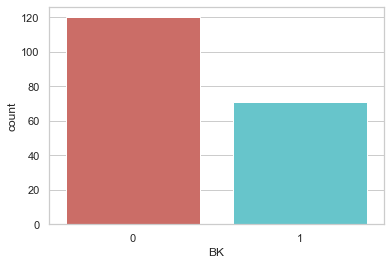

<Figure size 432x288 with 0 Axes>

In [15]:
sns.countplot(x='BK',data=data, palette = 'hls')
plt.show()
plt.savefig('count_plot')

In [16]:
count_no_sub = len(data[data['BK']==0])
count_sub = len(data[data['BK']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of healthy bank", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of bankruptcy", pct_of_sub*100)

percentage of healthy bank 62.82722513089005
percentage of bankruptcy 37.17277486910995


In [18]:
data.groupby('BK').mean()

,Data Year - Fiscal,Tobin's Q,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth
BK,,,,,,,,,,,,,,
0,2007.0,2.545333,1.884333,0.145250,-0.836250,0.069583,0.647833,1.103917,-0.863417,0.012333,1201.467333,1.571833,0.131683,0.059908
1,2010.0,1.772423,-2.652958,-0.257085,-2.940634,-0.254437,-3.371113,1.250690,-2.685085,-44.089324,52.931451,-0.142563,0.445592,0.004056


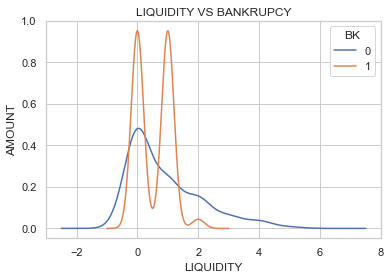

In [21]:
%matplotlib inline
pd.crosstab(data.Liquidity,data.BK).plot(kind='kde')
plt.title('LIQUIDITY VS BANKRUPCY')
plt.xlabel('LIQUIDITY')
plt.ylabel('AMOUNT')
plt.savefig('Liquidity')

In [36]:
train = data
train.head()

,Data Year - Fiscal,Tobin's Q,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,2007,6.650,-0.360,-1.350,-20.950,-0.160,-1.160,0.630,-0.260,-0.650,-1.470,-0.036,-0.296,-0.786,0
1,2009,0.825,-4.834,0.245,-1.853,-0.089,1.644,0.510,-0.174,-74.363,3.072,-0.542,-0.827,-0.681,1
2,2008,5.020,-0.056,0.041,-14.427,-2.367,0.190,0.506,-4.676,-0.626,2801.400,-0.141,-0.456,-0.600,1
3,2008,0.823,-0.375,0.073,-1.658,-0.209,1.869,0.231,-0.902,-5.777,30.435,-0.174,-0.615,-0.585,1
4,2008,2.664,-10.544,-0.416,-1.776,0.178,-1.585,1.133,0.157,-22.433,-0.215,-0.767,-0.647,-0.471,1


In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 194
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Data Year - Fiscal  191 non-null    int64  
 1   Tobin's Q           191 non-null    float64
 2   EPS                 191 non-null    float64
 3   Liquidity           191 non-null    float64
 4   Profitability       191 non-null    float64
 5   Productivity        191 non-null    float64
 6   Leverage Ratio      191 non-null    float64
 7   Asset Turnover      191 non-null    float64
 8   Operational Margin  191 non-null    float64
 9   Return on Equity    191 non-null    float64
 10  Market Book Ratio   191 non-null    float64
 11  Assets Growth       191 non-null    float64
 12  Sales Growth        191 non-null    float64
 13  Employee Growth     191 non-null    float64
 14  BK                  191 non-null    int64  
dtypes: float64(13), int64(2)
memory usage: 23.9 KB


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('BK',axis=1), 
                                                    train['BK'], test_size=0.30, 
                                                    random_state=101)

In [42]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='lbfgs', max_iter=700)
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [43]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        36
           1       0.83      0.86      0.84        22

    accuracy                           0.88        58
   macro avg       0.87      0.88      0.87        58
weighted avg       0.88      0.88      0.88        58



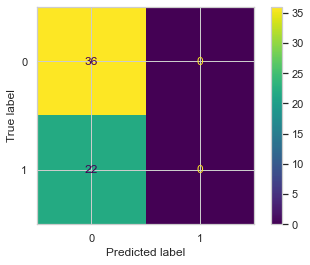

In [53]:
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
plot_confusion_matrix(clf, X_test, y_test)